In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


Bad key "text.kerning_factor" on line 4 in
c:\users\maxog\appdata\local\programs\python\python38\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# Machine Learning: Programming Exercise 2 
## Logistic Regression
In this exercise, you will implement logistic regression and apply it to two different datasets.

## 1. Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.
 Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams. `ex2.ipynb` will guide you through the exercise. o begin, run the code below to load the data into Python.

In [2]:
# Load Data
# The first two columns contain the exam scores and the third column contains the label.
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

### 1.1 Visualizing the data
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. The code below will load the data and display it on a 2-dimensional plot by calling the function plotData. You will now complete the code in plotData so that it displays a figure like Figure 1, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [3]:
def plot_data(x, y):
    # Find Indices of Positive and Negative Examples
    pos = np.where(y == 1)
    neg = np.where(y == 0)

    # Plot Examples
    pos_plot = plt.plot(x[pos, 0], x[pos, 1], 'k+', linewidth=2, markersize=7)
    neg_plot = plt.plot(x[neg, 0], x[neg, 1], 'ko', color='y', markersize=7)

    return pos_plot, neg_plot

Once you have added code to `plot_data`, run the code in this section to call the `plot_data` function.

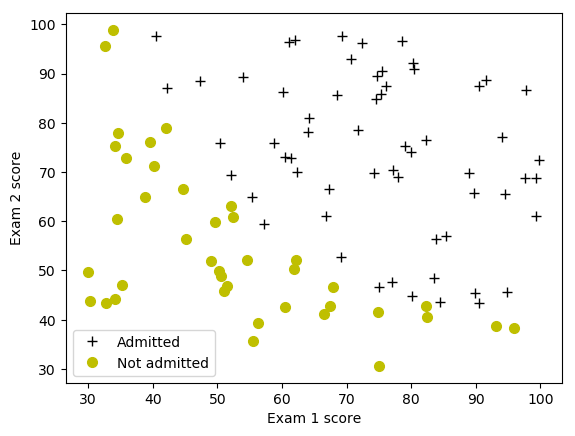

In [4]:
# Plot the data with + indicating (y = 1) examples and o indicating (y = 0) examples.
pos, neg = plot_data(X, y)
# Labels and Legend

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Specified in plot order
plt.legend([pos[0], neg[0]], ['Admitted', 'Not admitted'])

### 1.2 Implementation
#### 1.2.1 Warmup exercise: sigmoid function
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:
$$ h_{\theta}(x) = g(\theta^Tx),$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:
$$g(z) = \frac{1}{1+e^{-z}}$$
Your first step is to implement this function in `sigmoid` so it can be called by the rest of your program. When you are finished, try testing a few values by calling `sigmoid(x)` in the code section below. For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [5]:
def sigmoid(z):
    """
    Compute sigmoid function
    :returns g - the sigmoid of z.
    """
    return 1 / (1 + np.exp(-z))

In [6]:
# Provide input values to the sigmoid function below and run to check your implementation
sigmoid(0)

0.5

#### 1.2.2 Cost function and gradient
Now you will implement the cost function and gradient for logistic regression. Complete the code in `cost_function` to return the cost and gradient. Recall that the cost function in logistic regression is
$$J(\theta) =\frac{1}{m}\sum_{i=1}^m{\left[-y^{(i)} \log(h_{\theta}(x^{(i)}))- (1 -y^{(i)}) \log(1- h_{\theta}(x^{(i)}))\right],$$
and the gradient of the cost is a vector of the same length as $\theta$ where the $j$th element (for $j=0,1,2,...,n$) is defined as follows:
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m{\left( h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$$
Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$. Once you are done, run the code sections below to set up your data and call your costFunction using two sets of initial values of $\theta$.
#### Initialize the data

In [7]:
# Setup the data matrix appropriately
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Initialize fitting parameters
initial_theta = np.zeros(n + 1)

#### Compute the gradient
You should see that the `cost` is about 0.693 and gradients of about -0.1000,  -12.0092, and -11.2628 for all-zero $\theta$, and that the cost is  0.219 with gradients of 0.043, 2.566, 2.640 for non-zero $\theta$.

In [8]:
def cost_function(theta, x, y):
    """
    Compute cost and gradient for logistic regression
    :returns J - the cost of using theta as the parameter for logistic regression
    :returns grad - the gradient of the cost w.r.t. the parameters
    """
    m = len(y)

    h = sigmoid(np.dot(x, theta))
    J = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    grad = (1 / m) * np.dot(x.T, (h - y))

    return J, grad

In [9]:
# Compute and display the initial cost and gradient
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)

Cost at initial theta (zeros): 0.6931471805599453


In [10]:
print('Gradient at initial theta (zeros):')

Gradient at initial theta (zeros):


In [11]:
print(grad)

[ -0.1        -12.00921659 -11.26284221]


In [12]:
# Compute and display the cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = cost_function(test_theta, X, y)
print('Cost at test theta:', cost)

Cost at test theta: 0.21833019382659774


In [13]:
print('Gradient at test theta:'); print(grad)

Gradient at test theta:
[0.04290299 2.56623412 2.64679737]


#### 1.2.3 Learning parameters using `scipy.optimize`

In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradient descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use the `scipy.optimize` module. 
SciPy is a numerical computing library that includes optimization algorithms that find the minimum of a function. For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$. Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:
* The initial values of the parameters we are trying to optimize.
* A function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset $(X, y)$.

_*Constrains in optimization often refer to constraints on the parameters, for example, constraints that bound the possible values $\theta$ can take (e.g., $\theta \geq 0$). Logistic regression does not have such constraints since $\theta$ is allowed to take any real value._

We already have code written below to call `optimize.minimize` with the correct arguments:
* We first define the options to be used with `optimize.minimize`. Specifically, we set the
`maxiter` option to 400, so that `optimize.minimize` will run for at most 400 steps before it terminates.
* If you have completed the `cost_function` correctly, `optimize.minimize` will converge on the right optimization parameters and return the final values of the cost and $\theta$. Notice that by using `optimize.minimize`, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by `optimize.minimize`: you only needed to provide a function calculating the cost and the gradient.
* Once `optimize.minimize` completes, the remaining code will call your `cost_function` function using the optimal parameters of $\theta$. You should see that the cost is about 0.203. This final $\theta` value will then be used to plot the decision boundary on the training data.

Run the code below to call `optimize.minimize` with the correct arguments.

In [14]:
# Set options for optimize.minimize
options= {'maxiter': 400}

# Run minimize to obtain the optimal theta
# This function will return theta and the cost
import scipy.optimize as opt
res = opt.minimize(cost_function, initial_theta, (X, y), jac=True, method='TNC', options=options)
theta = res.x; cost = res.fun

In [15]:
# Print theta
print('Cost at theta found by optimize.minimize:', cost)

Cost at theta found by optimize.minimize: 0.20349770158947486


In [16]:
print('theta:', theta)

theta: [-25.16131857   0.20623159   0.20147149]


In [17]:
def plot_decision_boundary(theta, x, y):
    """
    Plots the data points x and y into a new figure with the decision boundary defined by theta
    """
    # Plot Data
    pos_plot, neg_plot = plot_data(x[:, 1:3], y)
    
    if x.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(x[:, 1]) - 2, np.max(x[:, 1]) + 2])
    
        # Calculate the decision boundary line
        plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
    
        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)
        plt.legend([pos_plot[0], neg_plot[0], 'Decision Boundary'], ['Admitted', 'Not admitted'])
        plt.axis([30, 100, 30, 100])
        return pos_plot, neg_plot
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = np.dot(map_feature(np.array([u[i]]), np.array([v[j]])), theta)
        z = z.T  # important to transpose z before calling contour
        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        return pos_plot, neg_plot

Text(0,0.5,'Exam 2 score')

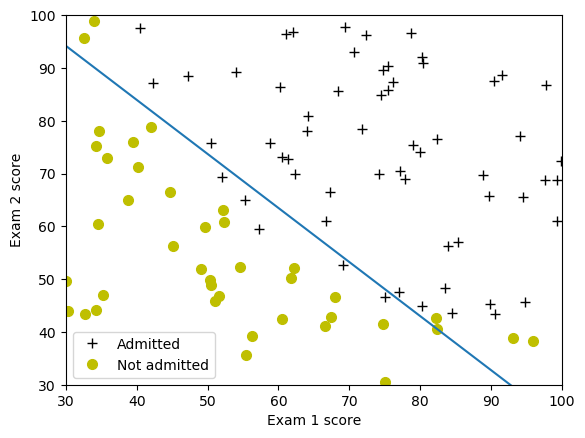

In [18]:
# Plot Boundary
pos, neg = plot_decision_boundary(theta, X, y)
# Add some labels
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

#### 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776. Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in `predict`. The predict function will produce '1' or '0' predictions given a dataset and a learned parameter vector $\theta$. 
After you have completed the code in `predict`, the code below will proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.


In [19]:
# Predict probability for a student with score 45 on exam 1 and score 85 on exam 2
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85, we predict an admission probability of:', prob)

For a student with scores 45 and 85, we predict an admission probability of: 0.7762906232819025


In [20]:
def predict(theta, x):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters theta
    """

    p = sigmoid(np.dot(x, theta)) >= 0.5

    return p

In [21]:
p = predict(theta, X)
print('Train Accuracy:', np.mean(p == y) * 100)

Train Accuracy: 89.0


## 2. Regularized logistic regression
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.
### 2.1 Visualizing the data
Similar to the previous parts of this exercise, `plot_data` is used to generate a figure where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

Run the code below to load the data and call the `plot_data` function.

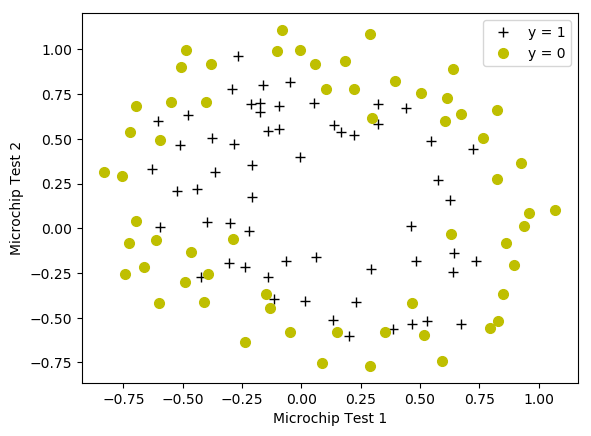

In [22]:
# The first two columns contain the exam scores and the third column contains the label (y).
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:, 0:2]; y = data[:, 2]

plot_data(X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
# Specified in plot order
plt.legend([pos[0], neg[0]], ['y = 1', 'y = 0'])

Figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### 2.2 Feature mapping
One way to fit the data better is to create more features from each data point. In the provided function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.
$$\text{map_feature}(x) = \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_1^2 \\ x_1x_2 \\ x_2^2 \\ x_1^3 \\ \vdots \\ x_1x_2^5 \\ x_2^6 \end{bmatrix}$$
As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

In [23]:
def map_feature(x1, x2):
    """
    Maps the two input features to quadratic features
    Returns a new feature array with more features, comprising of
    x1, x2, x1^2, x2^2, x1*x2, x1*x2^2, etc...
    """
    degree = 6
    out = np.ones((x1.shape[0], 1))

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.hstack((out, (x1 ** (i - j) * x2 ** j)[:, np.newaxis]))

    return out

Run the code below to map the features into a higher dimension.

In [24]:
# Add Polynomial Features
# Note that map_feature also adds a column of ones for us, so the intercept term is handled
X = map_feature(X[:, 0], X[:, 1])

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and combat the overfitting problem.

### 2.3 Cost function and gradient
Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code in `cost_function_reg` to return the cost and gradient. Recall that the regularized cost function in logistic regression is:
$$J(\theta) = \frac{1}{m}\sum_{i=1}^m{\left[-y^{(i)} \log(h_{\theta}(x^{(i)}))- (1 -y^{(i)}) \log(1- h_{\theta}(x^{(i)}))\right] + \frac{\lambda}{2m}\sum_{j=1}^n{\theta_j^2},$$
and the gradient of the cost is a vector where the $j$th element (for $j=0,1,2,...,n$) is defined as follows:
$$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^m{\left( h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)} \quad \text{for} \quad j=0,$$
$$\frac{\partial J(\theta)}{\partial \theta_j} = \left(\frac{1}{m}\sum_{i=1}^m{\left( h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}}\right) + \frac{\lambda}{m}\theta_j \quad \text{for} \quad j\geq 1.$$
Once you are done, the code below will call your `cost_function_reg` function using the initial value of $\theta$ (initialized to all zeros). You should see that the cost is about 0.693 and the gradients are about 0.0085, 0.0188, 0.0001, 0.0503.

In [25]:
def cost_function_reg(theta, x, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization
    :returns J - the cost of using theta as the parameter for logistic regression
    :returns grad - the gradient of the cost w.r.t. the parameters
    """
    m = len(y)

    h = sigmoid(np.dot(x, theta))
    J = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)) + (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    grad = (1 / m) * np.dot(x.T, (h - y)) + (lambda_ / m) * np.r_[0, theta[1:]]

    return J, grad

In [26]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic regression
cost, grad = cost_function_reg(initial_theta, X, y, lambda_)
print('Cost at initial theta (zeros):', cost)

Cost at initial theta (zeros): 0.6931471805599454


In [27]:
print('Expected cost (approx): 0.693')

Expected cost (approx): 0.693


In [28]:
print('Gradient at initial theta (zeros) - first five values only:')

Gradient at initial theta (zeros) - first five values only:


In [29]:
print(grad[:5])

[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


In [30]:
print('Expected gradients (approx) - first five values only:')

Expected gradients (approx) - first five values only:


In [31]:
print('[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]')

[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]


In [32]:
# Compute and display cost and gradient with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = cost_function_reg(test_theta, X, y, 10)
print('Cost at test theta (with lambda = 10):', cost)

Cost at test theta (with lambda = 10): 3.1645093316150095


In [33]:
print('Expected cost (approx): 3.16')

Expected cost (approx): 3.16


In [34]:
print('Gradient at test theta - first five values only:')

Gradient at test theta - first five values only:


In [35]:
print(grad[:5])

[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]


In [36]:
print('Expected gradients (approx) - first five values only:')

Expected gradients (approx) - first five values only:


In [37]:
print('[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


#### 2.3.1 Learning parameters using `scipy.optimize`
Similar to the previous part, you will use `optimize.minimize` to learn the optimal parameters $\theta$. If you have completed the `cost_function_reg` correctly, you should be able to run the code in the following section to learn the parameters using `optimize.minimize` for multiple values of $\lambda$.
### 2.4 Plotting the decision boundary
To help you visualize the model learned by this classifier, we have provided the function `plot_decision_boundary` which plots the (non-linear) decision boundary that separates the positive and negative examples. In `plot_decision_boundary`, we plot the non-linear decision boundary by computing the classifier's predictions on an evenly spaced grid and then and drew a contour plot of where the predictions change from $y = 0$ to $y = 1$. After learning the parameters, the code in the next section will plot a decision boundary.

### 2.5 Optional (ungraded) exercise
In this part of the exercise, you will get to try out different regularization parameters for the dataset to understand how regularization prevents overfitting. Notice the changes in the decision boundary as you vary $\lambda$. With a small $\lambda$, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data. 
This is not a good decision boundary: for example, it predicts that a point at $x = (0.25, 1.5)$ is accepted ($y = 1$), which seems to be an incorrect decision given the training set. With a larger $\lambda$, you should see a plot that shows an simpler decision boundary which still separates the positives and negatives fairly well. However, if $\lambda$ is set to too high a value, you will not get a good fit and the decision boundary will not follow the data so well, thus underfitting the data.

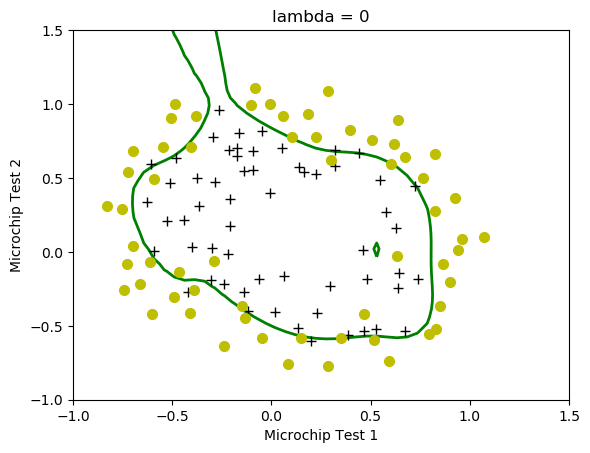

Train Accuracy: 87.28813559322035


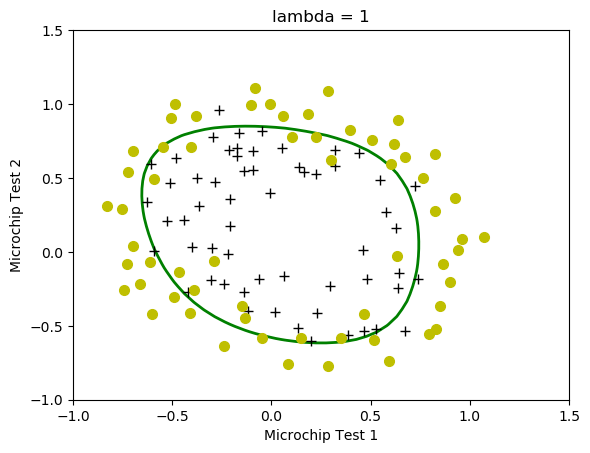

Train Accuracy: 83.05084745762711


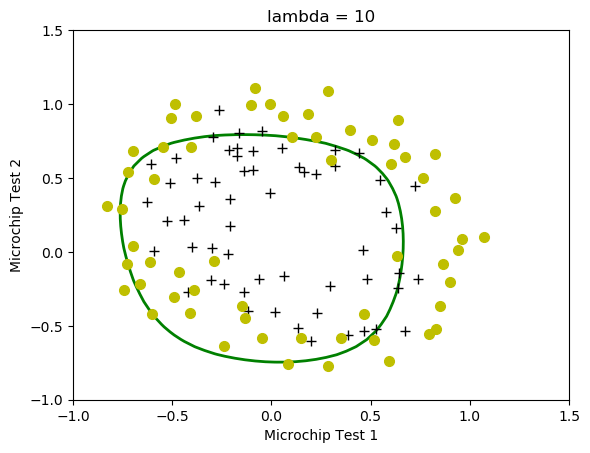

Train Accuracy: 74.57627118644068


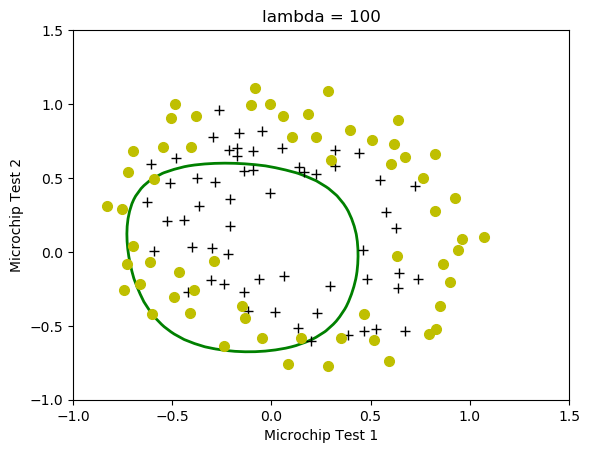

Train Accuracy: 61.016949152542374


In [38]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

lambda_ = [0, 1, 10, 100]
# Set options
options= {'maxiter': 400}

for l in lambda_:
    res = opt.minimize(cost_function_reg, initial_theta, (X, y, l), jac=True, method='TNC', options=options)
    theta = res.x; cost = res.fun
    # Plot Boundary
    plot_decision_boundary(theta, X, y)
    # Add some labels
    # Labels and Legend
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.title('lambda = ' + str(l))
    plt.show()
    # Compute accuracy on our training set
    p = predict(theta, X)
    print('Train Accuracy:', np.mean(p == y) * 100)